<h2><b>Given Dataset of Fishes</h2>
<h4>We have to predict the weight of the specie of fish using its attributes like lenght1,2,3,height and width

<hr>
<h2><center><b>Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>
<h2><center><b>Loading Dataset

In [2]:
df=pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<hr>
<h3><center><b>Data Preprocessing

In [3]:
df["weight"]=df["Weight"]
df.drop(columns="Weight",inplace=True)

In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.2, 25.4, 30.0, 11.52, 4.02],
      dtype=object)

<hr>
<h3><center><b>Exploratory Analysis

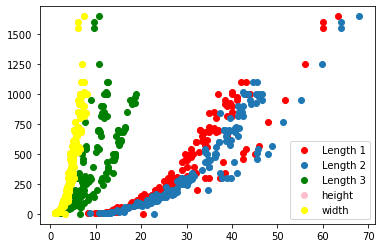

In [6]:
plt.scatter(x[:,8],y,color="red",label="Length 1")
plt.scatter(x[:,9],y,label="Length 2")
plt.scatter(x[:,10],y,color="green",label="Length 3")
plt.scatter(x[:,11],y,label="height",color="pink")
plt.scatter(x[:,11],y,label="width",color="yellow")
plt.legend()
plt.show()

<hr>
<h2><center><b>Machine Learning Models

# Multiple Linear Regression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)*100

95.073524800545

# Polynomial Reg
using Length1

In [8]:
from sklearn.preprocessing import PolynomialFeatures
reg_poly=LinearRegression()
pf=PolynomialFeatures(degree=11)
x_len_1=pf.fit_transform(x_train[:,8:9])
reg_poly.fit(x_len_1,y_train)
y_pred_l=reg_poly.predict(pf.fit_transform(x_test[:,8:9]))
r2_score(y_test,y_pred_l)

0.8727867084160482

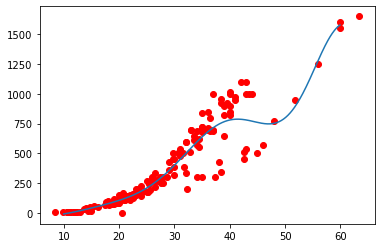

In [9]:
plt.scatter(x[:,8],y,color="red")
plt.plot(np.arange(10,60,0.1),reg_poly.predict(pf.fit_transform(np.arange(10,60,0.1).reshape(-1,1))))
plt.show()

0.935507156277447


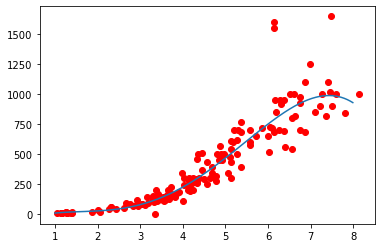

In [10]:
reg_poly_2=LinearRegression()
pf_2=PolynomialFeatures(degree=4)

x_len_1=pf_2.fit_transform(x_train[:,11:12])

reg_poly_2.fit(x_len_1,y_train)
y_pred_l=reg_poly_2.predict(pf_2.fit_transform(x_test[:,11:12]))
print(r2_score(y_test,y_pred_l))

plt.scatter(x[:,11],y,color="red")
plt.plot(np.arange(1,8,0.01),reg_poly_2.predict(pf_2.fit_transform(np.arange(1,8,0.01).reshape(-1,1))))
plt.show()

73.7838704964339


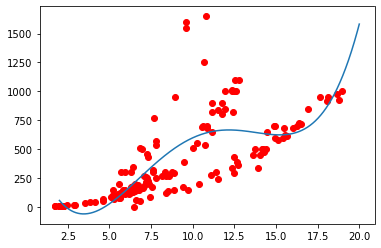

In [11]:
reg_poly_3=LinearRegression()
pf_3=PolynomialFeatures(degree=4)

x_len_2=pf_2.fit_transform(x_train[:,10:11])

reg_poly_3.fit(x_len_2,y_train)
y_pred_l=reg_poly_3.predict(pf_3.fit_transform(x_test[:,10:11]))
print(r2_score(y_test,y_pred_l)*100)

plt.scatter(x[:,10],y,color="red")
plt.plot(np.arange(2,20,0.01),reg_poly_3.predict(pf_3.fit_transform(np.arange(2,20,0.01).reshape(-1,1))))
plt.show()

# SVR Model

In [27]:
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler
s_xtrain=StandardScaler()
s_ytrain=StandardScaler()

std_x=s_xtrain.fit_transform(x_train)
std_xt=s_xtrain.transform(x_test)
std_y=s_ytrain.fit_transform(y_train)
reg_svr=SVR(kernel='rbf')
reg_svr.fit(std_x,std_y.ravel())
y_pred_svr=reg_svr.predict(std_xt)
print("rbf Kernel : ",r2_score(y_test,s_ytrain.inverse_transform(y_pred_svr.reshape(-1,1)))*100)

rbf Kernel :  94.86204918368945


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
reg_d=DecisionTreeRegressor()
reg_d.fit(x_train,y_train)
ypredd=reg_d.predict(x_test)
r2_score(y_test,ypredd)

0.9551905224865789

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
arr=[]
for i in range(150):     
    rfr=RandomForestRegressor(n_estimators=80,random_state=i)
    rfr.fit(x_train,y_train.ravel())
    ypredf=rfr.predict(x_test)
    arr.append(r2_score(y_test,ypredf)*100)
ar=np.array(arr)
ar.max()

97.67766119036277

# XGBoost Model
Gradient Boosting

In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
r2_score(y_test,y_pred)*100

95.93189934415102

# CatBoost Model

In [37]:
from catboost import CatBoost
cb = CatBoost()
cb.fit(x_train,y_train)
y_pred = cb.predict(x_test)
r2_score(y_test,y_pred)*100

Learning rate set to 0.029552
0:	learn: 343.3248328	total: 2.76ms	remaining: 2.76s
1:	learn: 336.0286507	total: 6.43ms	remaining: 3.21s
2:	learn: 329.0367266	total: 13ms	remaining: 4.32s
3:	learn: 322.0715875	total: 16.5ms	remaining: 4.11s
4:	learn: 315.6808409	total: 19.2ms	remaining: 3.81s
5:	learn: 309.5882082	total: 21.2ms	remaining: 3.52s
6:	learn: 302.8890603	total: 26.9ms	remaining: 3.82s
7:	learn: 296.4355834	total: 29.6ms	remaining: 3.67s
8:	learn: 290.2542482	total: 32.7ms	remaining: 3.6s
9:	learn: 285.3167953	total: 36.5ms	remaining: 3.61s
10:	learn: 279.8589225	total: 40.4ms	remaining: 3.63s
11:	learn: 274.7339274	total: 43.1ms	remaining: 3.55s
12:	learn: 269.2598120	total: 46.5ms	remaining: 3.53s
13:	learn: 264.2772952	total: 48.6ms	remaining: 3.42s
14:	learn: 258.7951215	total: 52.5ms	remaining: 3.45s
15:	learn: 254.0402361	total: 56.1ms	remaining: 3.45s
16:	learn: 249.3630861	total: 58.8ms	remaining: 3.4s
17:	learn: 244.6008957	total: 63.1ms	remaining: 3.44s
18:	learn: 2

98.13085093638011

# Artificial Neural Network

In [45]:
import tensorflow as tf

In [52]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))

In [48]:
x_train_ann = np.asarray(x_train).astype(np.float32)

In [55]:
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer="adam", loss="mean_squared_error")
ann.fit(x_train_ann,y_train,batch_size=16,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 8ms/step - loss: 1042235.8125
Epoch 2/300
8/8 [==============================] - 0s 5ms/step - loss: 979544.8125
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 918859.6250
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 868233.8125
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 819414.2500
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 773309.1250
Epoch 7/300
8/8 [==============================] - 0s 5ms/step - loss: 731910.1250
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 692122.8125
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 658225.0000
Epoch 10/300
8/8 [==============================] - 0s 5ms/step - loss: 625316.9375
Epoch 11/300
8/8 [==============================] - 0s 4ms/step - loss: 596305.1875
Epoch 12/300
8/8 [==============================] - 0s 4ms/step - loss: 570567.2500


In [56]:
y_pred = ann.predict(np.asarray(x_test).astype(np.float32))
r2_score(y_test,y_pred)*100

1/1 [==============================] - 0s 137ms/step


70.29386294643662

<hr><h4><center><b>CatBoost gave the highest r2-Score of 98.13</h3>